In [1]:
# steps =>
# 1. import data
# 2. data cleaning -> inconsistencies, missing values
# 3. Exploratory data analysis
# 4. Outlier detection and removal
# 5. Data balancing / Resampling
# 6. feature selection/ dimensionality reduction
# 7. Feature scaling
# 8. cross validation
# 9. Algorithms and hyperpara tuning
# 10. model building
# 11. predictions
# 12. deployment

In [2]:
# data => grapes_new.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('grapes_new.csv')
df.head()

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,...,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE,CLASS
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean,High
1,112.57,elliptical,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,...,1.05,1050,23.40,51.91,31.28,99.05,7.66,48.18,archean,High
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean,High
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial,High
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean,High


In [6]:
df.shape

(194, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COLOR_INTENSITY    194 non-null    float64
 1   SHAPE              194 non-null    object 
 2   RIPENESS_PER       192 non-null    float64
 3   ALCOHOL_PER        191 non-null    float64
 4   MALIC_ACID_PER     194 non-null    float64
 5   ASH                194 non-null    float64
 6   ALCALINITY_OF_ASH  188 non-null    float64
 7   MAGNESIUM_MEASURE  194 non-null    int64  
 8   TOTAL_PHENOLS      194 non-null    float64
 9   FLAVANOIDS         194 non-null    float64
 10  PROANTHOCYANINS    194 non-null    float64
 11  HUE                192 non-null    float64
 12  PROLINE            194 non-null    int64  
 13  TEMPERATURE        194 non-null    float64
 14  AVG_HUMIDITY       194 non-null    float64
 15  FERT_NITRO_PER     194 non-null    float64
 16  WATER_O2_PER       190 non

In [9]:
df.columns

Index(['COLOR_INTENSITY', 'SHAPE', 'RIPENESS_PER', 'ALCOHOL_PER',
       'MALIC_ACID_PER', 'ASH', 'ALCALINITY_OF_ASH', 'MAGNESIUM_MEASURE',
       'TOTAL_PHENOLS', 'FLAVANOIDS', 'PROANTHOCYANINS', 'HUE', 'PROLINE',
       'TEMPERATURE', 'AVG_HUMIDITY', 'FERT_NITRO_PER', 'WATER_O2_PER',
       'WATER_PH', 'FER_P2O5_PER', 'SOIL_TYPE', 'CLASS'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         2
ALCOHOL_PER          3
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    6
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  2
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         4
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

In [12]:
df.ffill(inplace=True)

In [13]:
# eda

In [25]:
x = df.drop('CLASS', axis=1)
y = df['CLASS']

In [26]:
y.value_counts()

CLASS
Medium    76
High      64
Low       54
Name: count, dtype: int64

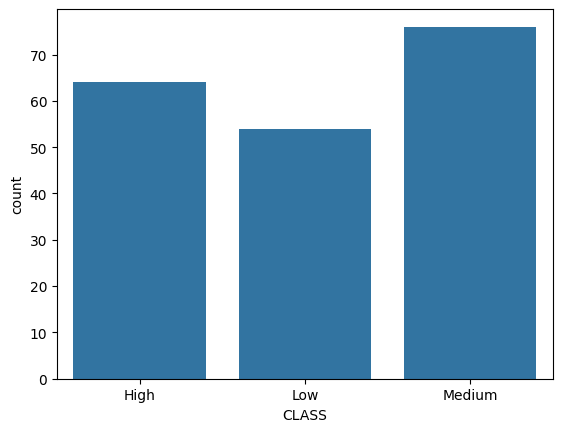

In [27]:
sns.countplot(x = y);

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

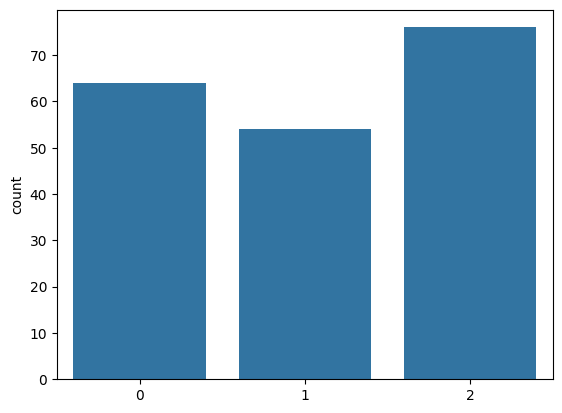

In [29]:
sns.countplot(x = y);

In [33]:
one = x.iloc[:, 0:4]
one['CLASS'] = y

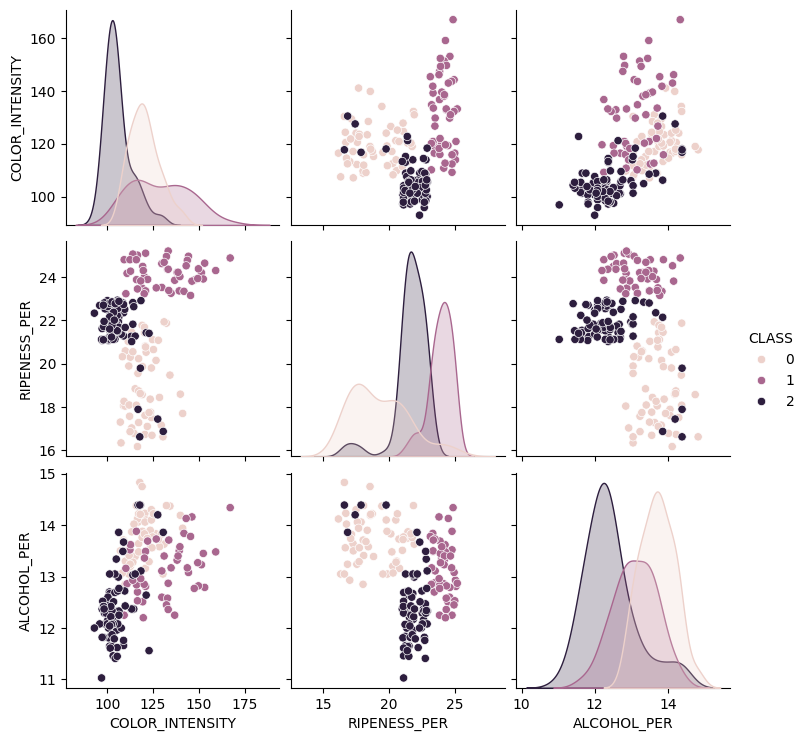

In [35]:
sns.pairplot(one, hue='CLASS');

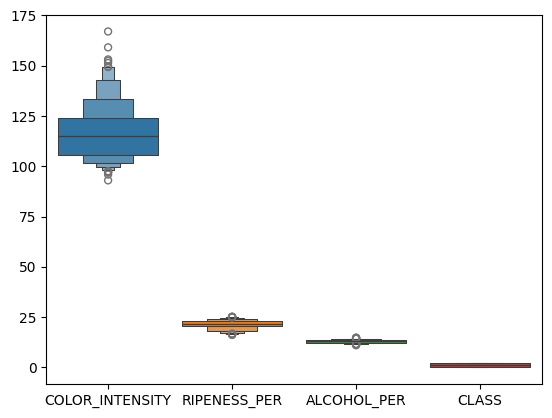

In [39]:
sns.boxenplot(data=one);

In [40]:
# ohe

In [41]:
x = pd.get_dummies(x, drop_first=True)

In [42]:
x.shape

(194, 20)

In [43]:
x.columns

Index(['COLOR_INTENSITY', 'RIPENESS_PER', 'ALCOHOL_PER', 'MALIC_ACID_PER',
       'ASH', 'ALCALINITY_OF_ASH', 'MAGNESIUM_MEASURE', 'TOTAL_PHENOLS',
       'FLAVANOIDS', 'PROANTHOCYANINS', 'HUE', 'PROLINE', 'TEMPERATURE',
       'AVG_HUMIDITY', 'FERT_NITRO_PER', 'WATER_O2_PER', 'WATER_PH',
       'FER_P2O5_PER', 'SHAPE_round', 'SOIL_TYPE_archean'],
      dtype='object')

In [44]:
x

,COLOR_INTENSITY,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,PROANTHOCYANINS,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SHAPE_round,SOIL_TYPE_archean
0,120.53,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,2.29,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,False,True
1,112.57,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,1.28,1.05,1050,23.40,51.91,31.28,99.05,7.66,48.18,False,True
2,120.78,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,2.81,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,False,True
3,134.17,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,2.18,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,False,False
4,112.19,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,1.82,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,102.34,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,1.35,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,False,False
190,109.80,21.67,12.43,1.53,2.29,21.0,86,2.74,3.15,1.77,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,False,True
191,103.86,22.01,11.79,2.13,2.78,28.5,92,2.13,2.24,1.76,0.97,466,27.62,48.98,30.46,86.31,7.57,47.57,True,True
192,98.30,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,1.90,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,False,False


In [45]:
# outlier removal

In [46]:
from sklearn.ensemble import IsolationForest

In [47]:
iso = IsolationForest(contamination=0.02, random_state=0)

In [48]:
clean = iso.fit_predict(x)
clean

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [49]:
x  = x[clean==1]
y  = y[clean==1]

In [50]:
x.shape

(190, 20)

In [51]:
# feature selection

In [52]:
from sklearn.feature_selection import SelectKBest, chi2

In [53]:
skb = SelectKBest(score_func=chi2, k=5)

In [54]:
x_new = skb.fit_transform(x, y)
x_new.shape

(190, 5)

In [59]:
skb.get_support();

In [58]:
x = x.loc[:, skb.get_support()]
x

,COLOR_INTENSITY,FLAVANOIDS,PROLINE,TEMPERATURE,FER_P2O5_PER
0,120.53,3.06,1065,23.34,52.02
1,112.57,2.76,1050,23.40,48.18
2,120.78,3.24,1185,22.29,28.15
3,134.17,3.49,1480,21.28,55.95
4,112.19,2.69,735,23.76,55.99
...,...,...,...,...,...
189,102.34,2.65,378,25.58,55.83
190,109.80,3.15,352,24.23,55.47
191,103.86,2.24,466,27.62,47.57
192,98.30,2.45,342,27.54,45.91


In [60]:
# cross val

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [62]:
# standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
# model building

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# create the parameter grid

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 12, 14, 17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [66]:
grid = GridSearchCV(KNeighborsClassifier(),
                     param_grid, cv=5, 
                     n_jobs=-1, verbose=1)

In [67]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'algorithm': ['auto', 'ball_tree', ...], 'metric': ['euclidean', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold a

In [69]:
grid.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 3,
 'weights': 'uniform'}

In [70]:
y_pred = grid.predict(x_test)

In [71]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

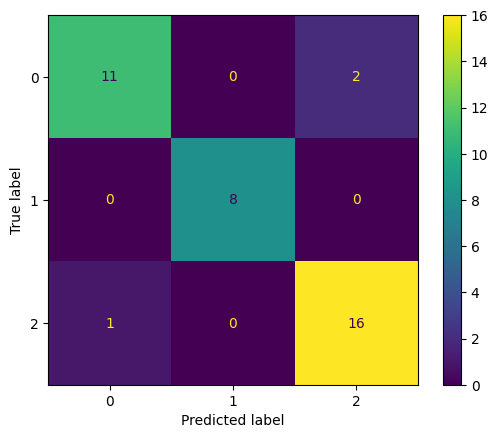

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       1.00      1.00      1.00         8
           2       0.89      0.94      0.91        17

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38



In [75]:
accuracy_score(y_test, y_pred)

0.9210526315789473

In [76]:
# serialize the model

In [77]:
import joblib

In [78]:
joblib.dump(grid, 'knn_grapes_model.pkl')
joblib.dump(sc, 'scaler_grapes_model.pkl')

['scaler_grapes_model.pkl']